# Student Name: Nghia Nguyen - Applicant ID: APFE25m00527 Email:nghiab1302214@gmail.com

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()
print("File list included:", file_list)
# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        data = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date, group_date in data.groupby(data["tpep_pickup_datetime"].dt.date):
            # Iterate through each hour of the selected date
          for hour, group_hour in group_date.groupby(group_date["tpep_pickup_datetime"].dt.hour):
                # Sample 5% of the hourly data randomly
            sampled = group_hour.sample(frac = 0.05, random_state = 42)
                # add data of this hour to the dataframe
            sampled_data = pd.concat([sampled_data,sampled])
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data],ignore_index = True)# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

File list included: ['2023-1.parquet', '2023-2.parquet', '2023-3.parquet', '2023-4.parquet', '2023-5.parquet', '2023-6.parquet', '2023-7.parquet', '2023-8.parquet', '2023-9.parquet', '2023-10.parquet', '2023-11.parquet', '2023-12.parquet']


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
df = df.sample(n=300000, random_state = 42)
df.to_parquet('/content/drive/MyDrive/NYC_Taxi_Sampled.parquet', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
df = pd.read_parquet('/content/drive/MyDrive/NYC_Taxi_Sampled.parquet')

In [ ]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-10-02 18:26:58   2023-10-02 18:40:44              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   
2         2  2023-07-11 20:10:33   2023-07-11 20:20:35              1.0   
3         2  2023-04-07 22:25:23   2023-04-07 22:34:20              1.0   
4         1  2023-12-08 15:30:29   2023-12-08 15:50:44              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.20         1.0                  N           162           236   
1           0.90         1.0                  N           186           170   
2           1.34         1.0                  N            43           239   
3           1.64         1.0                  N           229           107   
4           5.70         1.0                  Y           166           243   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         14.9    3.5      0.5        3.95           0.0   
1             2         10.0    0.0      0.5        0.00           0.0   
2             2         10.7    1.0      0.5        0.00           0.0   
3             1         10.7    1.0      0.5        3.14           0.0   
4             1         26.8    0.0      0.5        7.05           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         23.85                   2.5          NaN   
1                    1.0         14.00                   2.5          0.0   
2                    1.0         15.70                   2.5          NaN   
3                    1.0         18.84                   2.5          NaN   
4                    1.0         35.35                   0.0          NaN   

   Airport_fee  
0          0.0  
1          NaN  
2          0.0  
3          0.0  
4          0.0

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
# Comebine 2 columns Airport_fee and airport_fee
#drop columns "store_and_fwd_flag" since the information is not nescessary and most of the value is "N".
df = df.drop(columns = ["store_and_fwd_flag"])
# the index includes both uppercase and lowercase
df.columns = df.columns.str.lower() #convert all the index to lowercase

In [ ]:
df.head()

vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-10-02 18:26:58   2023-10-02 18:40:44              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   
2         2  2023-07-11 20:10:33   2023-07-11 20:20:35              1.0   
3         2  2023-04-07 22:25:23   2023-04-07 22:34:20              1.0   
4         1  2023-12-08 15:30:29   2023-12-08 15:50:44              1.0   

   trip_distance  ratecodeid  pulocationid  dolocationid  payment_type  \
0           2.20         1.0           162           236             1   
1           0.90         1.0           186           170             2   
2           1.34         1.0            43           239             2   
3           1.64         1.0           229           107             1   
4           5.70         1.0           166           243             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         14.9    3.5      0.5        3.95           0.0   
1         10.0    0.0      0.5        0.00           0.0   
2         10.7    1.0      0.5        0.00           0.0   
3         10.7    1.0      0.5        3.14           0.0   
4         26.8    0.0      0.5        7.05           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         23.85                   2.5          NaN   
1                    1.0         14.00                   2.5          0.0   
2                    1.0         15.70                   2.5          NaN   
3                    1.0         18.84                   2.5          NaN   
4                    1.0         35.35                   0.0          NaN   

   airport_fee  
0          0.0  
1          NaN  
2          0.0  
3          0.0  
4          0.0

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns
df["airportfee"] = df.iloc[:, 17].fillna(0) + df.iloc[:, 18].fillna(0)
# Drop the old duplicate "airport_fee" column
df = df.drop(columns = ["airport_fee"])
# Rename back to airport_fee
df.rename(columns ={"airportfee":"airport_fee"},inplace = True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
df[df["fare_amount"] < 0]
# In this df (5% of trip_records data) we dont have any negative values in "fare_amount" column

Empty DataFrame
Columns: [vendorid, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, ratecodeid, pulocationid, dolocationid, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
# Have no negative fare amounts in this 5% if trip_record data to analyse
df["ratecodeid"].unique()
# Base on Data dictionary, ratecodeid only include 6 rate codes from 1 to 6, we find here have "nan" and "99" values which arent mention.

array([ 1.,  2., nan,  5., 99.,  3.,  4.,  6.])

In [ ]:
# Find which columns have negative values
numeric_df = df.select_dtypes(include=[np.number]) #Group columns have numeric value
neg_cols = numeric_df.columns[(numeric_df < 0).any()]
print(neg_cols)


Index(['mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')


In [ ]:
# fix these negative values
df[neg_cols] = df[neg_cols].abs()

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
missing_ratio = df.isna().mean()
missing_ratio


vendorid                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.033897
trip_distance            0.000000
ratecodeid               0.033897
pulocationid             0.000000
dolocationid             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.033897
airport_fee              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
df[df["passenger_count"].isna()]

vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
35             1  2023-02-15 19:32:47   2023-02-15 19:45:46              NaN   
71             1  2023-10-31 17:28:35   2023-10-31 17:38:26              NaN   
74             6  2023-07-11 14:07:55   2023-07-11 21:07:31              NaN   
91             1  2023-03-23 09:49:53   2023-03-23 10:02:21              NaN   
108            6  2023-03-28 14:03:18   2023-03-28 15:03:25              NaN   
...          ...                  ...                   ...              ...   
299717         1  2023-11-21 13:08:54   2023-11-21 13:32:17              NaN   
299854         1  2023-11-28 21:11:23   2023-11-28 21:22:27              NaN   
299867         1  2023-10-20 23:33:48   2023-10-20 23:55:53              NaN   
299914         1  2023-01-30 13:53:59   2023-01-30 14:07:52              NaN   
299920         1  2023-05-07 15:19:38   2023-05-07 15:45:45              NaN   

        trip_distance  ratecodeid  pulocationid  dolocationid  payment_type  \
35               2.00         NaN           162           142             0   
71               1.00         NaN           249           113             0   
74               4.74         NaN           265           224             0   
91               1.90         NaN           236           161             0   
108              4.09         NaN           265            17             0   
...               ...         ...           ...           ...           ...   
299717           0.00         NaN            74           244             0   
299854           0.00         NaN           162            90             0   
299867           4.20         NaN           186           238             0   
299914           2.00         NaN           161           262             0   
299920           4.30         NaN           236            90             0   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
35            12.80    2.5      0.5        2.90           0.0   
71            10.00    2.5      0.5        2.48           0.0   
74            29.39    0.0      0.5        0.00           0.0   
91            13.50    0.0      0.5        3.50           0.0   
108           40.20    0.0      0.5        0.00           0.0   
...             ...    ...      ...         ...           ...   
299717        19.67    0.0      0.5        0.00           0.0   
299854        13.57    0.0      0.5        0.00           0.0   
299867        23.30    1.0      0.5        4.25           0.0   
299914        10.00    0.0      0.5        2.10           0.0   
299920        26.10    0.0      0.5        3.01           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
35                        1.0         22.20                   NaN          0.0  
71                        1.0         18.98                   NaN          0.0  
74                        0.3         30.19                   NaN          0.0  
91                        1.0         21.00                   NaN          0.0  
108                       0.3         41.00                   NaN          0.0  
...                       ...           ...                   ...          ...  
299717                    1.0         21.17                   NaN          0.0  
299854                    1.0         17.57                   NaN          0.0  
299867                    1.0         32.55                   NaN          0.0  
299914                    1.0         16.10                   NaN          0.0  
299920                    1.0         33.11                   NaN          0.0  

[10169 rows x 18 columns]

In [ ]:
# Impute NaN values in 'passenger_count'
mode_pc_value = df["passenger_count"].mode()[0] #find the mode value of passenger count column.
df["passenger_count"] = df["passenger_count"].fillna(mode_pc_value) #replace NaN value with mode value

Did you find zeroes in passenger_count? Handle these.



In [ ]:
# Display the rows with zero values
df[df["passenger_count"]==0]

vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5              1  2023-06-16 14:37:19   2023-06-16 14:59:27              0.0   
122            1  2023-07-29 23:07:12   2023-07-29 23:08:42              0.0   
133            1  2023-10-31 13:44:55   2023-10-31 13:56:21              0.0   
180            1  2023-03-12 21:31:07   2023-03-12 21:38:49              0.0   
183            1  2023-02-08 16:34:21   2023-02-08 16:42:34              0.0   
...          ...                  ...                   ...              ...   
299757         1  2023-09-10 10:21:56   2023-09-10 10:45:53              0.0   
299773         1  2023-01-07 17:03:20   2023-01-07 17:22:22              0.0   
299845         1  2023-06-15 14:16:28   2023-06-15 14:51:24              0.0   
299905         1  2023-05-21 11:25:49   2023-05-21 13:34:33              0.0   
299906         1  2023-02-04 10:02:06   2023-02-04 10:06:31              0.0   

        trip_distance  ratecodeid  pulocationid  dolocationid  payment_type  \
5                 2.4         1.0            48           234             2   
122               0.5         1.0           238           236             1   
133               1.4         1.0            43           161             1   
180               2.5         1.0           233           263             1   
183               1.1         1.0           237           142             1   
...               ...         ...           ...           ...           ...   
299757           10.1         1.0           161           138             1   
299773            4.8         1.0            75            50             2   
299845            9.9         1.0           162           138             1   
299905           19.5         2.0           230           132             1   
299906            0.5         1.0           137           170             1   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
5              19.8    2.5      0.5        0.00          0.00   
122             5.1    1.0      0.5        0.00          0.00   
133            10.0    2.5      0.5        2.80          0.00   
180            12.1    3.5      0.5        2.00          0.00   
183             8.6    5.0      0.5        3.75          0.00   
...             ...    ...      ...         ...           ...   
299757         41.5    7.5      0.5       11.45          6.94   
299773         24.7    2.5      0.5        0.00          0.00   
299845         45.7    7.5      0.5       14.05          6.55   
299905         70.0    2.5      0.5       16.10          6.55   
299906          5.8    2.5      0.5        1.95          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
5                         1.0         23.80                   2.5          0.0  
122                       1.0          7.60                   0.0          0.0  
133                       1.0         16.80                   2.5          0.0  
180                       1.0         19.10                   2.5          0.0  
183                       1.0         18.85                   2.5          0.0  
...                       ...           ...                   ...          ...  
299757                    1.0         68.89                   2.5          0.0  
299773                    1.0         28.70                   2.5          0.0  
299845                    1.0         75.30                   2.5          0.0  
299905                    1.0         96.65                   2.5          0.0  
299906                    1.0         11.75                   2.5          0.0  

[4636 rows x 18 columns]

In [ ]:
#replace zero value with mode value
df.loc[df["passenger_count"]==0,"passenger_count"] = mode_pc_value

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# ratecodeid is category type
df.ratecodeid.value_counts()

ratecodeid
1.0     273617
2.0      11422
99.0      1624
5.0       1601
3.0        971
4.0        595
6.0          1
Name: count, dtype: int64

In [ ]:
# Fix missing values in 'RatecodeID'
# replace NaN value with "1.0" => the most popular category
df["ratecodeid"]= df["ratecodeid"].fillna(1.0)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
df.congestion_surcharge.isna().sum()

np.int64(10169)

In [ ]:
# handle null values in congestion_surcharge
# for congestion surcharge we cant remove 10.169 value => it make more sense for NaN values are 0 (this drive have no congestion surcharge)
df["congestion_surcharge"]= df["congestion_surcharge"].fillna(0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
nan_columns = df.columns[df.isna().any()].tolist()
print(nan_columns)
#No more Nan values in the Data

[]


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
print(df.describe(include='all'))

# Check for potential out of place values in various columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Kiểm tra outliers theo IQR cho từng cột
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Column '{col}' has {len(outliers)} outliers. Min={df[col].min()}, Max={df[col].max()}")

            vendorid        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  300000.000000                      300000                      300000   
mean        1.734790  2023-07-03 04:29:05.694913  2023-07-03 04:46:33.325543   
min         1.000000         2023-01-01 00:02:19         2023-01-01 00:09:40   
25%         1.000000  2023-04-03 08:29:21.250000         2023-04-03 08:49:41   
50%         2.000000  2023-06-28 07:53:17.500000  2023-06-28 08:04:38.500000   
75%         2.000000  2023-10-06 22:39:59.750000  2023-10-06 22:52:07.500000   
max         6.000000         2023-12-31 23:57:12         2024-01-01 00:29:11   
std         0.446775                         NaN                         NaN   

       passenger_count  trip_distance     ratecodeid   pulocationid  \
count    300000.000000  300000.000000  300000.000000  300000.000000   
mean          1.373843       3.682413       1.602367     165.367917   
min           1.000000       0.000000       1.000000       1.00000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
df = df[df["passenger_count"] <= 6]

In [ ]:
# Continue with outlier handling

# remove trip_distance = 0, it doesnt make sense
df = df[df["trip_distance"] != 0]

# Remove suspicious trip which trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df["trip_distance"] <= 0.1) & (df["fare_amount"] > 300))]

# Remove susipicious trip which trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
df = df[~((df["trip_distance"]==0) & (df["fare_amount"]==0) & (df["pulocationid"]!= df["dolocationid"]))]

# Remove trip_distance is more than 250 miles
df = df[~(df["trip_distance"] > 250)]

# Replace payment_type from 0 to 5 (Unknow payment type is suitable)
df.loc[df["payment_type"] == 0, "payment_type"] = 5

In [ ]:
# Do any columns need standardising?

# Replace ratecodeid value 99 to 1, this is category data type (99 not include in data dictionary, More than 75% ratecodeid value is 1)
df.loc[df["ratecodeid"] == 99.0, "ratecodeid"] = 1

# There are several long drive more than 100km make some fare amount/ extra/ tip higher and susipicious but they are true information.
# Some drives have same pulocationid and dolocationid because they were just a short trip inside the same Taxi Zone

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['vendorid',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'ratecodeid',
 'pulocationid',
 'dolocationid',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [ ]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(
    include=['int64', 'float64','datetime64[ns]']
).columns.tolist()

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Reclassify some numeric-coded columns as categorical
special_categoricals = ["vendorid", "ratecodeid", "pulocationid", "dolocationid", "payment_type"]
for col in special_categoricals:
    if col in numerical_cols:
        numerical_cols.remove(col)
        categorical_cols.append(col)

# Output results
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
Categorical columns: ['vendorid', 'ratecodeid', 'pulocationid', 'dolocationid', 'payment_type']


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [ ]:
# Add pickup_hour, pickup_date, pickup_moth to the data
df['pickup_time'] = df["tpep_pickup_datetime"].dt.hour
df['pickup_day'] = df["tpep_pickup_datetime"].dt.dayofweek
df['pickup_month'] = df["tpep_pickup_datetime"].dt.month

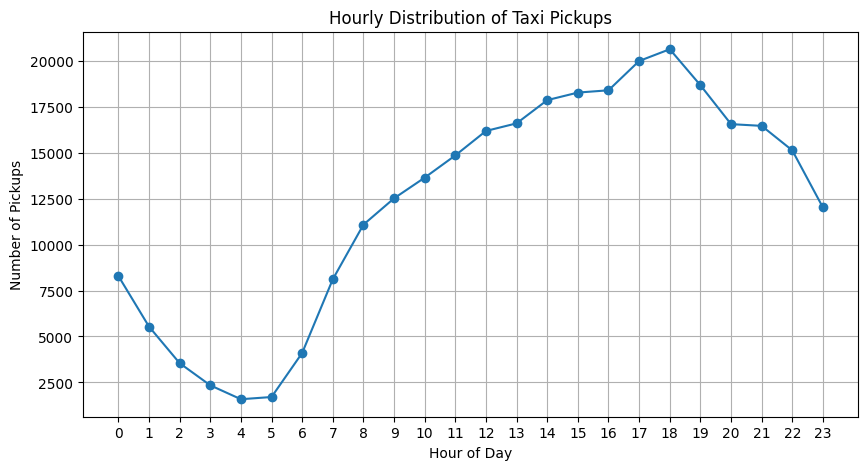

In [ ]:
# Find and show the hourly trends in taxi pickups

# Hourly distribution
# Group by hour of the day to find pickup trends
hourly = df.groupby('pickup_time').size()
# Plot hourly distribution
plt.figure(figsize=(10,5))
plt.plot(hourly.index, hourly.values, marker='o')
plt.title("Hourly Distribution of Taxi Pickups")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

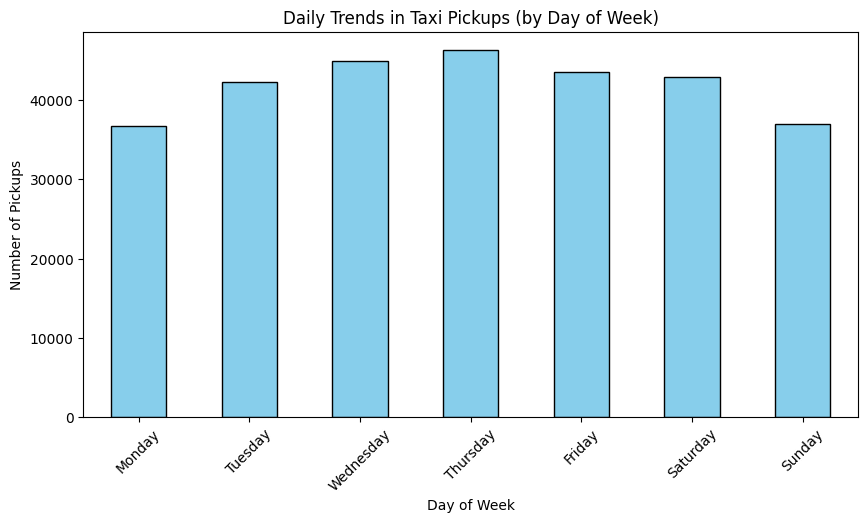

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)
day_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday',
           4:'Friday', 5:'Saturday', 6:'Sunday'}
df['pickup_day_name'] = df['pickup_day'].map(day_map)

# Group and count drives per day of week
daily_trends = df.groupby('pickup_day_name').size().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

# plot a chart
plt.figure(figsize=(10,5))
daily_trends.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Daily Trends in Taxi Pickups (by Day of Week)")
plt.xlabel("Day of Week")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.show()


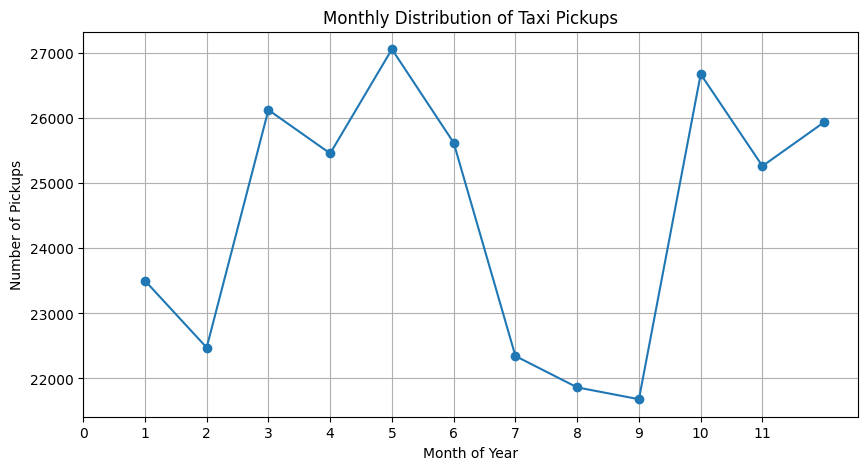

In [ ]:
# Show the monthly trends in pickups

monthly = df.groupby('pickup_month').size()

plt.figure(figsize=(10,5))
plt.plot(monthly.index, monthly.values, marker='o')
plt.title("Monthly Distribution of Taxi Pickups")
plt.xlabel("Month of Year")
plt.ylabel("Number of Pickups")
plt.xticks(range(0,12))
plt.grid(True)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
cols = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

for col in cols:
    zeros = (df[col] == 0).sum()
    negatives = (df[col] < 0).sum()
    print(f"{col}: {zeros} zero values, {negatives} negative values")

fare_amount: 49 zero values, 0 negative values
tip_amount: 64228 zero values, 0 negative values
total_amount: 9 zero values, 0 negative values
trip_distance: 0 zero values, 0 negative values


- *After cleaned the negatives values (step 2.1.3), there is 0 negative value remain in the data*

- *There are 49 zero values in fare_amount, 9 zeros values in total_amount tentatives because of 9 in 49 zero fare_amount drives with 0 tip_amount and 0 tolls_amount => May be they are 100% fare_amount voucher/discount but they could also result from data entry errors, which require further verification.*
- *For tip_amount have 64228 zero values is understandable because the tip is optional for the customer. This zero values also included tip by cash (mention in data dictionary)*

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

*These are just a small number of zero value **suspicious** (49 values) so it's safe to remove themm without affect to the data*

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

*We had drop all the 0 distance and remove suspicious trip which trip_distance is nearly 0 and fare_amount is more than 300 in Step 2.3.1*

In [ ]:
# Create a df with non zero entries for the selected parameters.
# Keep only rows with positive fare, total amount, and trip distance
df_clean = df[
    (df['fare_amount'] > 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
].copy()


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [ ]:
# Group data by month and analyse monthly revenue
monthly_revenue = df_clean.groupby('pickup_month')['total_amount'].sum()


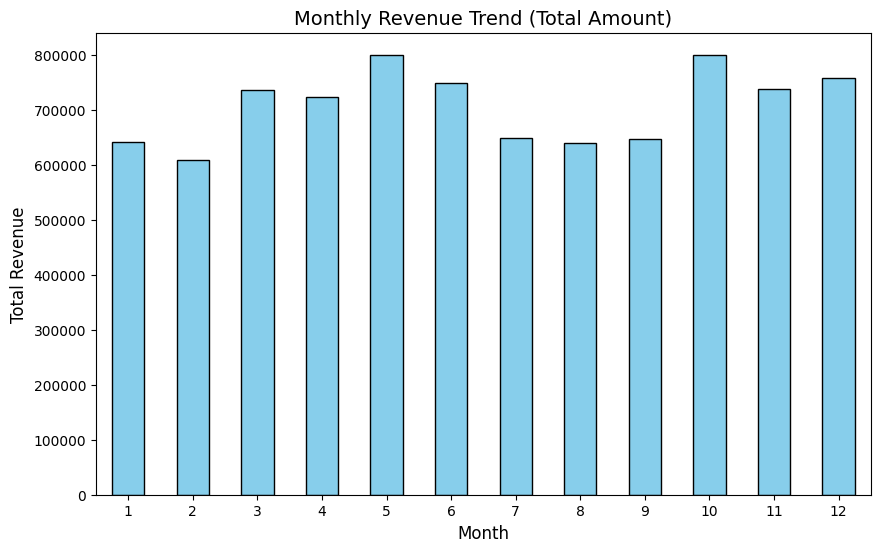

In [ ]:
# plot a chart
plt.figure(figsize=(10,6))
monthly_revenue.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Monthly Revenue Trend (Total Amount)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=0)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [ ]:
# Calculate proportion of each quarter
# Add pickup quarter feature
df_clean['pickup_quarter'] = df_clean['tpep_pickup_datetime'].dt.to_period('Q')

# Calculate total revenue per quarter
quarterly_revenue = df_clean.groupby('pickup_quarter')['total_amount'].sum()

# Calculate proportion of each quarter
quarterly_proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100

print("Quarterly Revenue:")
print(quarterly_revenue)

print("\nQuarterly Proportion (%):")
print(quarterly_proportion)

Quarterly Revenue:
pickup_quarter
2023Q1    1986015.23
2023Q2    2271718.63
2023Q3    1934480.38
2023Q4    2293820.46
Freq: Q-DEC, Name: total_amount, dtype: float64

Quarterly Proportion (%):
pickup_quarter
2023Q1    23.403336
2023Q2    26.770084
2023Q3    22.796046
2023Q4    27.030534
Freq: Q-DEC, Name: total_amount, dtype: float64


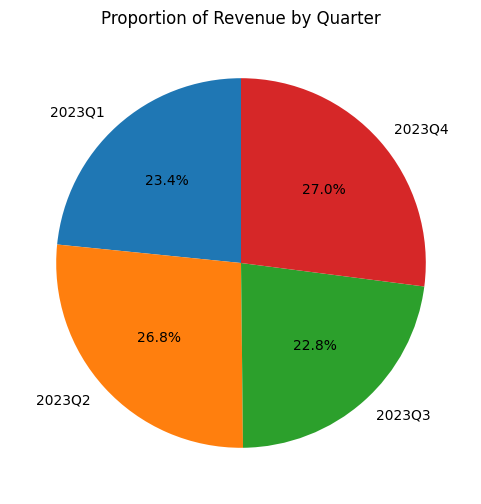

In [ ]:
# Plot revenue proportion by quarter
quarterly_proportion.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), startangle=90)
plt.title("Proportion of Revenue by Quarter")
plt.ylabel("")
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

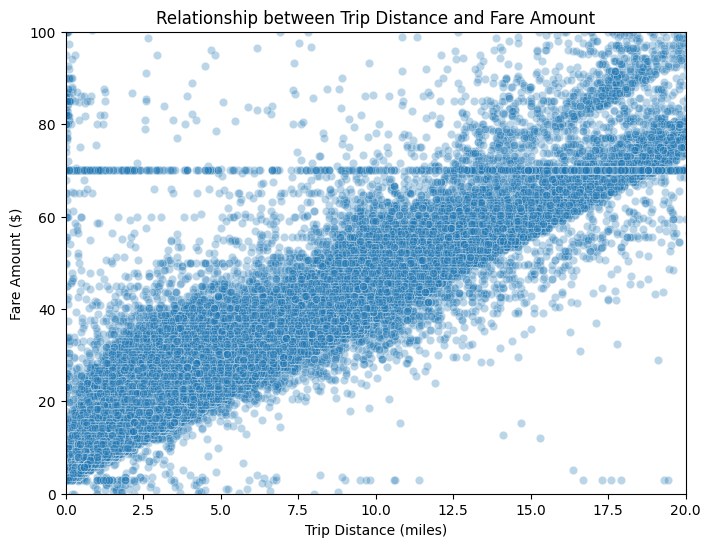

Correlation between trip_distance and fare_amount: 0.9415


In [ ]:
# Show how trip fare is affected by distance
# all trip_distance - 0 have been removed in cleaning data step.
# plot a chart

plt.figure(figsize=(8,6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_clean, alpha=0.3)
plt.title("Relationship between Trip Distance and Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.xlim(0, 20)
plt.ylim(0, 100)
plt.show()
correlation = df_clean['trip_distance'].corr(df_clean['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")

*Correlation value is 0.9415 near to 1 saying that trip_distance and fare_amount have strong - positive relationship. The longer the distance the higher of the fare and vice versa*

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

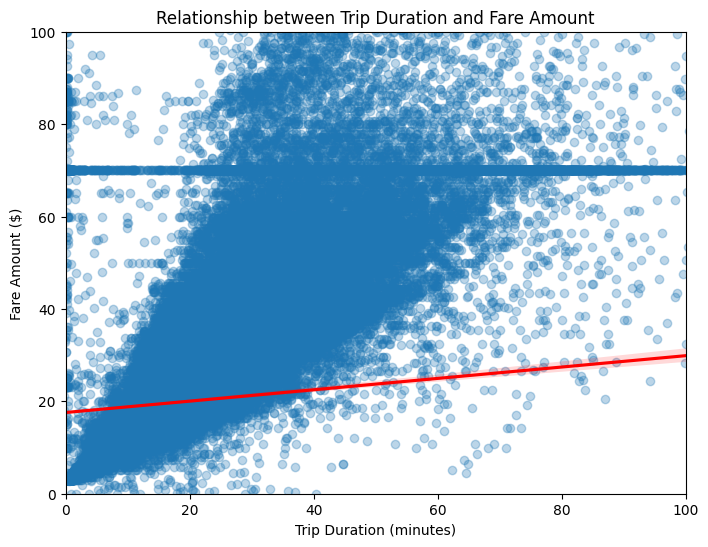

Correlation between trip_duration and fare_amount: 0.2788


In [ ]:
# Show relationship between fare and trip duration
# Calculate the trip_duration, change value data type to Seconds
df_clean["trip_duration"] = (df_clean["tpep_dropoff_datetime"] - df_clean["tpep_pickup_datetime"]).dt.total_seconds() / 60

plt.figure(figsize=(8,6))
sns.regplot(
    x="trip_duration",
    y="fare_amount",
    data=df_clean,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title("Relationship between Trip Duration and Fare Amount")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.xlim(0, 100)   # giới hạn để tránh outliers
plt.ylim(0, 100)
plt.show()

# Correlation
correlation = df_clean["trip_duration"].corr(df_clean["fare_amount"])
print(f"Correlation between trip_duration and fare_amount: {correlation:.4f}")

*The relationship between trip duration and fare amount shows only a slight upward trend, but it is not significant. This is reasonable because taxi fares are primarily based on trip distance, while trip duration can be extended by traffic congestion without causing a proportional increase in fare.”*

*“Additionally, the strong horizontal line around 70 USD suggests the presence of a flat rate, such as airport trips or fixed-fare zones, where the fare is capped at a set amount regardless of the trip duration. This further weakens the correlation between duration and fare*

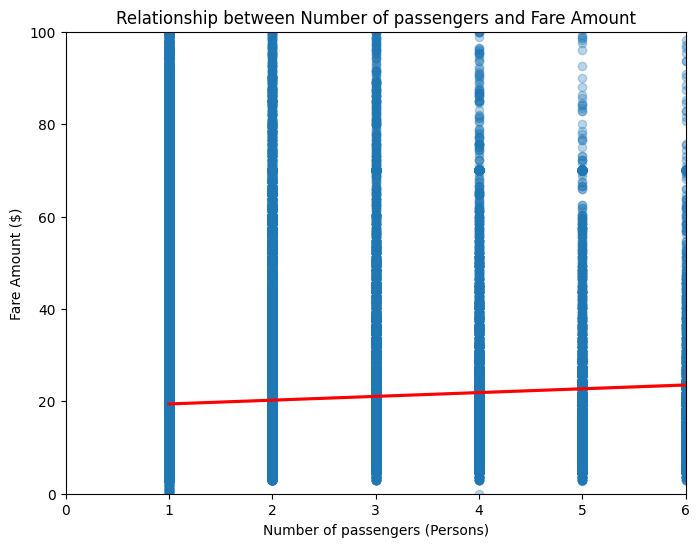

Correlation between passenger_count and fare_amount: 0.0395


In [ ]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8,6))
sns.regplot(
    x="passenger_count",
    y="fare_amount",
    data=df_clean,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title("Relationship between Number of passengers and Fare Amount")
plt.xlabel("Number of passengers (Persons)")
plt.ylabel("Fare Amount ($)")
plt.xlim(0, 6)
plt.ylim(0, 100)
plt.show()

# Correlation
correlation = df_clean["passenger_count"].corr(df_clean["fare_amount"])
print(f"Correlation between passenger_count and fare_amount: {correlation:.4f}")


*We couldnt find the "Car Type" or "Car Seat" which could affect the fare mounth due to the type of Car/Seat.*
*In this Data set, with the correlation between Passenger count and fare amount: 0.0395, we can state that there's no relationship between them.*

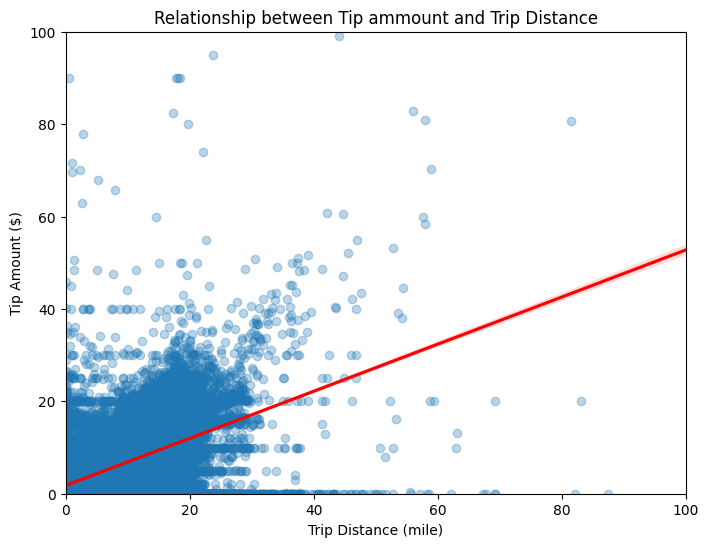

Correlation between trip_distance and tip_amount: 0.5888


In [ ]:
# Show relationship between tip and trip distance
plt.figure(figsize=(8,6))
sns.regplot(
    x="trip_distance",
    y="tip_amount",
    data=df_clean,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title("Relationship between Tip ammount and Trip Distance")
plt.xlabel("Trip Distance (mile)")
plt.ylabel("Tip Amount ($)")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

# Correlation
correlation = df_clean["trip_distance"].corr(df_clean["tip_amount"])
print(f"Correlation between trip_distance and tip_amount: {correlation:.4f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [ ]:
# Analyse the distribution of different payment types
payment_map = {1:'Credit Card', 2:'Cash', 3:'No Charge', 4:'Dispute'}

# Map numeric codes to descriptive names
df_clean['payment_type_name'] = df_clean['payment_type'].map(payment_map)

# Calculate revenue and proportion by payment type
payment_revenue = df_clean.groupby('payment_type_name')['total_amount'].sum()
payment_proportion = (payment_revenue / payment_revenue.sum()) * 100

print("Payment Revenue:")
print(payment_revenue)

print("\nPayment Proportion (%):")
print(payment_proportion)


Payment Revenue:
payment_type_name
Cash           1230948.55
Credit Card    6935130.18
Dispute          49169.05
No Charge        23808.81
Name: total_amount, dtype: float64

Payment Proportion (%):
payment_type_name
Cash           14.940407
Credit Card    84.173838
Dispute         0.596780
No Charge       0.288975
Name: total_amount, dtype: float64


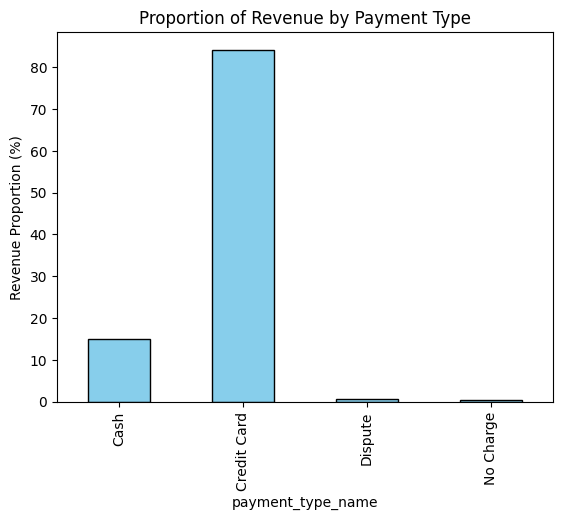

In [ ]:
# Plot bar chart
payment_proportion.plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel("Revenue Proportion (%)")
plt.title("Proportion of Revenue by Payment Type")
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file("/content/drive/MyDrive/taxi_zones/taxi_zones.shp") # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

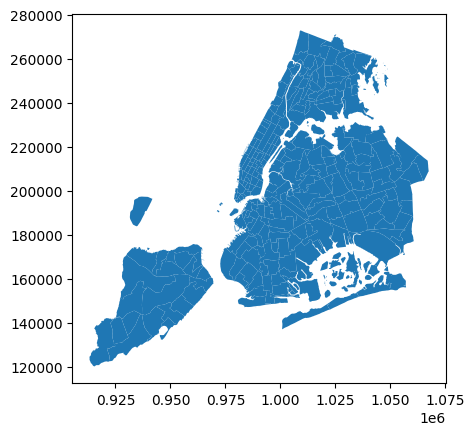

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
df_merge = df_clean.merge(zones,
    how="left",
    left_on="pulocationid",
    right_on="LocationID"
)
df_merge.head()

vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-10-02 18:26:58   2023-10-02 18:40:44              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   
2         2  2023-07-11 20:10:33   2023-07-11 20:20:35              1.0   
3         2  2023-04-07 22:25:23   2023-04-07 22:34:20              1.0   
4         1  2023-12-08 15:30:29   2023-12-08 15:50:44              1.0   

   trip_distance  ratecodeid  pulocationid  dolocationid  payment_type  \
0           2.20         1.0           162           236             1   
1           0.90         1.0           186           170             2   
2           1.34         1.0            43           239             2   
3           1.64         1.0           229           107             1   
4           5.70         1.0           166           243             1   

   fare_amount  ...  pickup_quarter  trip_duration  payment_type_name  \
0         14.9  ...          2023Q4      13.766667        Credit Card   
1         10.0  ...          2023Q1       9.216667               Cash   
2         10.7  ...          2023Q3      10.033333               Cash   
3         10.7  ...          2023Q2       8.950000        Credit Card   
4         26.8  ...          2023Q4      20.250000        Credit Card   

   OBJECTID  Shape_Leng  Shape_Area                           zone  \
0     162.0    0.035270    0.000048                   Midtown East   
1     186.0    0.024696    0.000037   Penn Station/Madison Sq West   
2      43.0    0.099739    0.000380                   Central Park   
3     229.0    0.042525    0.000095  Sutton Place/Turtle Bay North   
4     166.0    0.068824    0.000255            Morningside Heights   

   LocationID    borough                                           geometry  
0       162.0  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...  
1       186.0  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...  
2        43.0  Manhattan  POLYGON ((991852.973 217950.807, 991725.244 21...  
3       229.0  Manhattan  POLYGON ((994880.664 214401.395, 994724.359 21...  
4       166.0  Manhattan  POLYGON ((996131.213 235950.777, 996354.986 23...  

[5 rows x 32 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips
trips_by_locationID = df_merge.groupby(["LocationID","zone"]).size().reset_index(name="trip_count")
top10_locations = trips_by_locationID.sort_values("trip_count", ascending=False).head(10)
print(top10_locations)

     LocationID                          zone  trip_count
112       132.0                   JFK Airport       15074
208       237.0         Upper East Side South       13955
140       161.0                Midtown Center       13769
207       236.0         Upper East Side North       12411
141       162.0                  Midtown East       10364
118       138.0             LaGuardia Airport       10086
162       186.0  Penn Station/Madison Sq West       10047
122       142.0           Lincoln Square East        9754
201       230.0     Times Sq/Theatre District        9638
149       170.0                   Murray Hill        8700


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame
zones_merge = zones.merge(trips_by_locationID,how = "left")


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

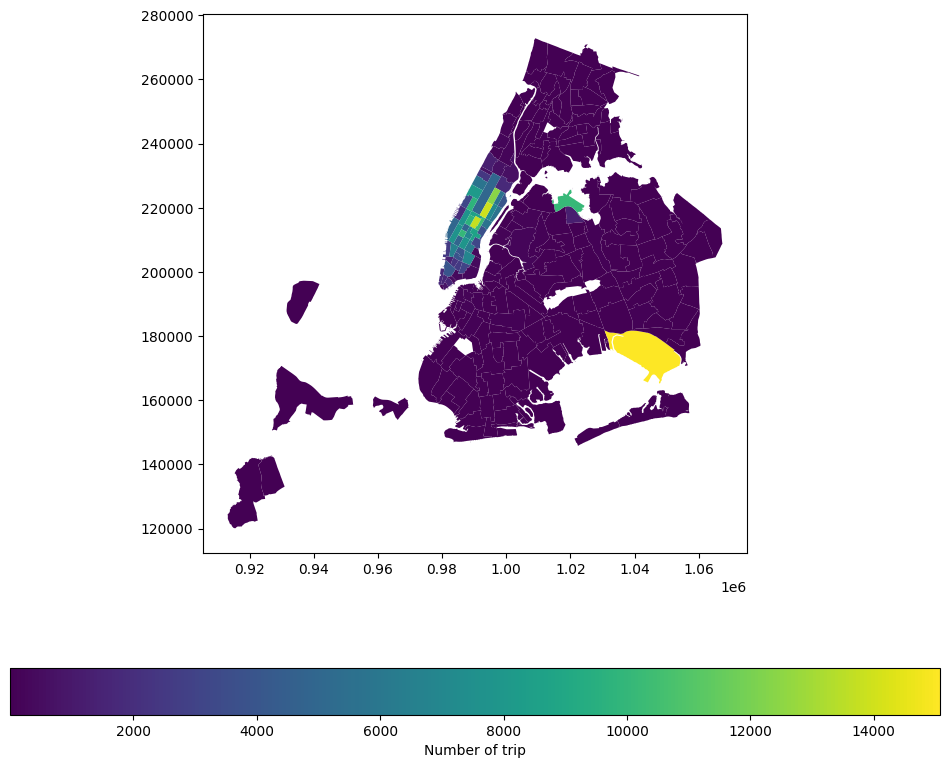

In [ ]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones_merge.plot(
column = 'trip_count',
ax = ax,
legend = True,
legend_kwds = {'label': "Number of trip", 'orientation': "horizontal"})
plt.show()

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
print(zones_merge.sort_values("trip_count", ascending = False)[["LocationID", "zone", "trip_count"]])


     LocationID                      zone  trip_count
131         132               JFK Airport     15074.0
236         237     Upper East Side South     13955.0
160         161            Midtown Center     13769.0
235         236     Upper East Side North     12411.0
161         162              Midtown East     10364.0
..          ...                       ...         ...
213         214  South Beach/Dongan Hills         NaN
220         221                 Stapleton         NaN
244         245             West Brighton         NaN
250         251               Westerleigh         NaN
252         253             Willets Point         NaN

[263 rows x 3 columns]


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day
# Clean the new data first
df_clean = df_merge[(df_merge["trip_distance"] > 0) & (df_merge["trip_duration"] > 0)]


In [ ]:
# add route index
df_clean["route"] = (df_clean["pulocationid"].astype(str) + "_to_" + df_clean["dolocationid"].astype(str))

# Calculate speed/drive
df_clean["trip_speed"] = df_clean["trip_distance"] / (df_clean["trip_duration"]/60)

# clean the data with quantile
df_clean = df_clean[(df_clean["trip_speed"] >= df_clean["trip_speed"].quantile(0.01)) & (df_clean["trip_speed"] <= df_clean["trip_speed"].quantile(0.99))]

# Average speed groupby route and pickup_time
route_speed = (
    df_clean
    .groupby(["route", "pickup_time"])
    .agg(
        avg_speed = ("trip_speed", "mean"),
        avg_distance = ("trip_distance","mean"),
        avg_duration = ("trip_duration","mean"),
        num_trips = ("trip_speed", "count"),
    ).reset_index())
# Sort out route with more than 5 trips per hour.
route_speed = route_speed[route_speed["num_trips"] >= 100]
# Sort out top 10 slow speed
slow_routes = route_speed.sort_values("avg_speed").head(10)
slow_routes

route  pickup_time  avg_speed  avg_distance  avg_duration  \
42145  237_to_237           12   6.579650      0.697788      6.886378   
42144  237_to_237           11   6.664744      0.665800      6.457833   
42147  237_to_237           14   6.833322      0.738396      7.112264   
40897  236_to_237           15   7.040979      1.036284      9.398536   
40893  236_to_237           11   7.070998      1.104516     10.312796   
40894  236_to_237           12   7.283040      1.053260      9.404144   
40895  236_to_237           13   7.304909      1.040840      9.283206   
40896  236_to_237           14   7.421656      1.046400      9.168133   
42148  237_to_237           15   7.493886      0.689204      6.486136   
42146  237_to_237           13   7.518132      0.698857      6.075873   

       num_trips  
42145        104  
42144        100  
42147        106  
40897        148  
40893        155  
40894        181  
40895        131  
40896        125  
42148        113  
42146        105

In [ ]:
route_speed.num_trips.describe()

count     45.000000
mean     124.955556
std       22.433696
min      100.000000
25%      108.000000
50%      114.000000
75%      143.000000
max      182.000000
Name: num_trips, dtype: float64

In [ ]:
busiest_hour = (
    route_speed
    .loc[route_speed.groupby("route")["num_trips"].idxmax(), ["route", "pickup_time", "num_trips"]]
    .rename(columns={"pickup_time": "busiest_hour", "num_trips": "busiest_num_trips"})
)
route_detail = (route_speed.groupby(["route"]).agg(
    total_trips = ("num_trips","sum"),
    route_avg_speed = ("avg_speed","mean"),
    slowest_speed = ("avg_speed","min"),
    highest_speed = ("avg_speed","max")
    ).reset_index()).merge(busiest_hour, on="route", how="left")

In [ ]:
route_detail.sort_values("total_trips",ascending = False).head(20)

route  total_trips  route_avg_speed  slowest_speed  highest_speed  \
2  237_to_236         1643         9.947977       8.225866      13.281544   
1  236_to_237         1368         7.920930       7.040979       9.458894   
4  264_to_264         1311        10.789683       9.655487      13.275410   
3  237_to_237          744         7.272556       6.579650       7.963749   
0  236_to_236          557         8.869318       7.754855       9.664338   

   busiest_hour  busiest_num_trips  
2            14                182  
1            12                181  
4            17                150  
3            15                113  
0            14                116

How does identifying high-traffic, high-demand routes help us?



You know where demand is concentrated → allocate more vehicles to those areas.

Reduce passenger wait times and idle driving.

Helps plan driver shifts to cover peak demand hours on busy routes.


**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest hour: 18h with ~20,365 trips


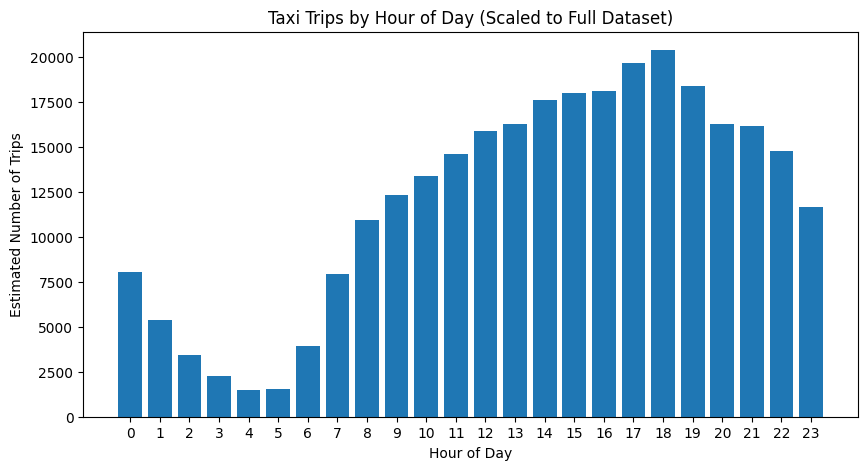

In [ ]:
# Visualise the number of trips per hour and find the busiest hour
# 1. Đếm số lượng trips theo từng giờ
hourly_trips = df_clean.groupby("pickup_time").size().reset_index(name="num_trips")

busiest_row = hourly_trips.loc[hourly_trips["num_trips"].idxmax()]

busiest_hour = busiest_row["pickup_time"]
busiest_trips = busiest_row["num_trips"]

print(f"Busiest hour: {busiest_hour}h with ~{int(busiest_trips):,} trips")

# 4. Vẽ biểu đồ
plt.figure(figsize=(10,5))
plt.bar(hourly_trips["pickup_time"], hourly_trips["num_trips"])
plt.xlabel("Hour of Day")
plt.ylabel("Estimated Number of Trips")
plt.title("Taxi Trips by Hour of Day (Scaled to Full Dataset)")
plt.xticks(range(0,24))
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips ratio = 0.05 (5%)

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
hourly_trips["scaled_trips"] = hourly_trips["num_trips"] / sample_fraction
top10_hours = hourly_trips.sort_values("scaled_trips", ascending=False).head(10)
print("Top 10 busiest hours (scaled to actual trips):")
print(top10_hours)

Top 10 busiest hours (scaled to actual trips):
    pickup_time  num_trips  scaled_trips
18           18      20365      407300.0
17           17      19670      393400.0
19           19      18372      367440.0
16           16      18085      361700.0
15           15      17971      359420.0
14           14      17593      351860.0
20           20      16277      325540.0
13           13      16246      324920.0
21           21      16135      322700.0
12           12      15849      316980.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

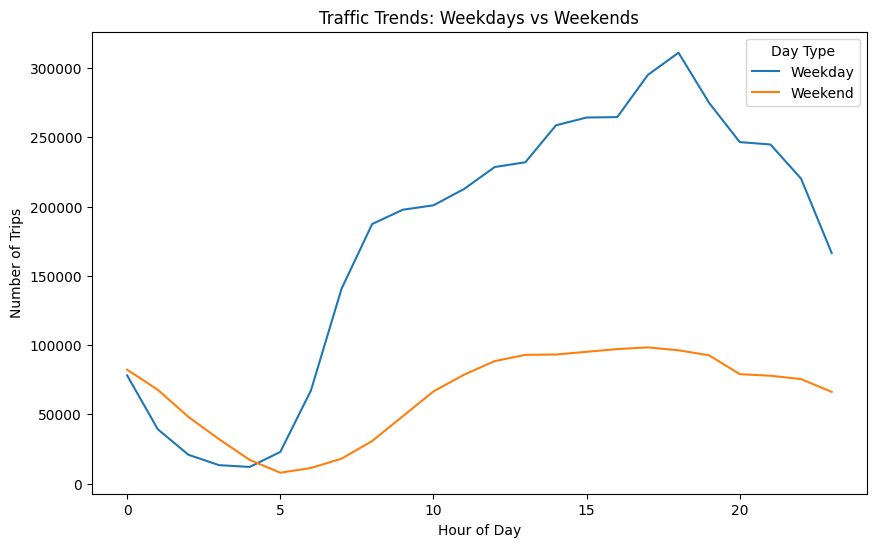

In [ ]:
# Compare traffic trends for the week days and weekends
df_clean["day_type"] = df_clean["pickup_day"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

traffic_trends = (
    df_clean.groupby(["day_type", df_clean["pickup_time"]])
    .size()
    .reset_index(name="trip_count"))

# Scale up the number of trips ratio = 0.05 (5%)
traffic_trends["trip_count_scaled"] = traffic_trends["trip_count"] / sample_fraction

traffic_pivot = traffic_trends.pivot(index="pickup_time", columns="day_type", values="trip_count_scaled")

# Plot
traffic_pivot.plot(kind="line", figsize=(10,6))
plt.title("Traffic Trends: Weekdays vs Weekends")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.legend(title="Day Type")
plt.show()

In [ ]:
dfff = traffic_trends.groupby("day_type")["trip_count"].sum()
dfff

day_type
Weekday    210004
Weekend     78086
Name: trip_count, dtype: int64

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

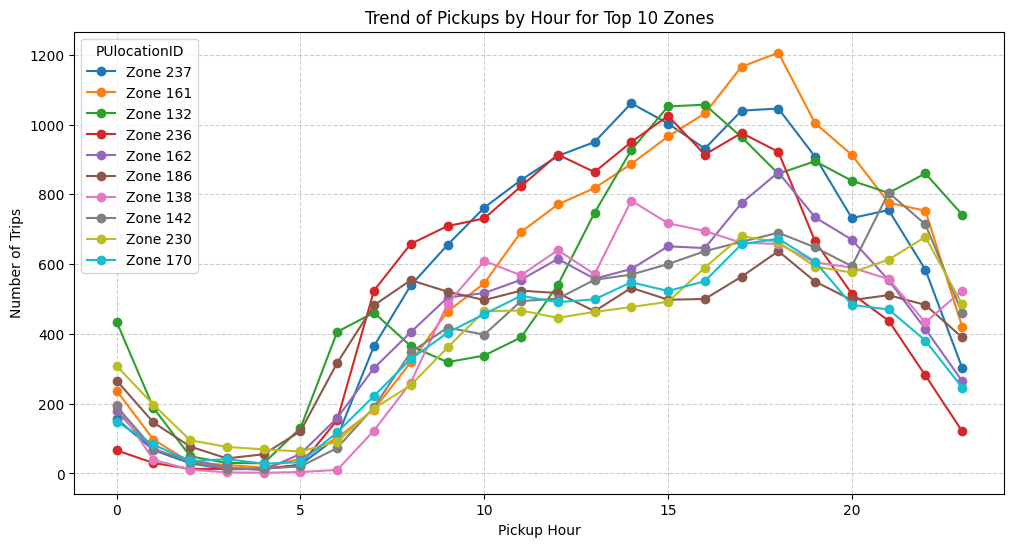

In [ ]:
# Find top 10 pickup and dropoff zones
top10_puzones = df_clean["pulocationid"].value_counts().nlargest(10).index
df_top10 = df_clean[df_clean["pulocationid"].isin(top10_puzones)]


trend = df_top10.groupby(["pulocationid", "pickup_time"]).size().reset_index(name="trips")

# 4. Vẽ biểu đồ trend
plt.figure(figsize=(12, 6))
for zone in top10_puzones:
    zone_data = trend[trend["pulocationid"] == zone]
    plt.plot(zone_data["pickup_time"], zone_data["trips"], marker="o", label=f"Zone {zone}")

plt.title("Trend of Pickups by Hour for Top 10 Zones")
plt.xlabel("Pickup Hour")
plt.ylabel("Number of Trips")
plt.legend(title="PUlocationID")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [ ]:
df_clean["dropoff_time"] = pd.to_datetime(df_clean["tpep_dropoff_datetime"]).dt.hour

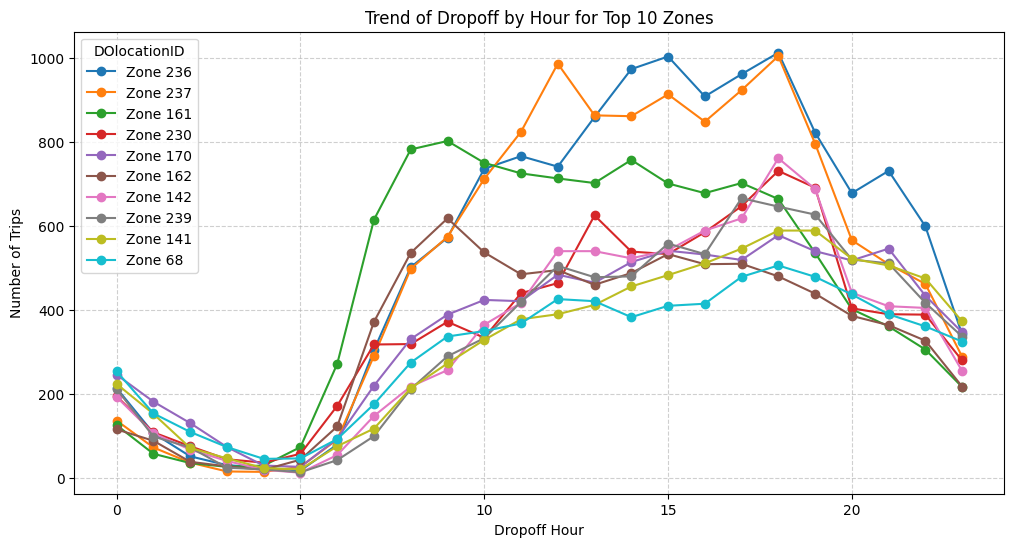

In [ ]:
# Find top 10 dropoff zones

top10_dozones = df_clean["dolocationid"].value_counts().nlargest(10).index
df_top10 = df_clean[df_clean["dolocationid"].isin(top10_dozones)]



trend = df_top10.groupby(["dolocationid", "dropoff_time"]).size().reset_index(name="trips")

# 4. Vẽ biểu đồ trend
plt.figure(figsize=(12, 6))
for zone in top10_dozones:
    zone_data = trend[trend["dolocationid"] == zone]
    plt.plot(zone_data["dropoff_time"], zone_data["trips"], marker="o", label=f"Zone {zone}")

plt.title("Trend of Dropoff by Hour for Top 10 Zones")
plt.xlabel("Dropoff Hour")
plt.ylabel("Number of Trips")
plt.legend(title="DOlocationID")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Count pickup/location
pickup_counts = df_clean["pulocationid"].value_counts().rename_axis("LocationID").reset_index(name="pickups")

# Count dropoff/location
dropoff_counts = df_clean["dolocationid"].value_counts().rename_axis("LocationID").reset_index(name="dropoffs")

# Merge pickup and dropoff
ratios = pickup_counts.merge(dropoff_counts, on="LocationID", how="outer").fillna(0)

# pickup/dropoff ratio
ratios["pickup_dropoff_ratio"] = ratios["pickups"] / ratios["dropoffs"].replace(0, np.nan)

# Display the 10 highest
top10 = ratios.sort_values("pickup_dropoff_ratio", ascending=False).head(10)
bottom10 = ratios.sort_values("pickup_dropoff_ratio", ascending=True).head(10)

print("Top 10 Pickup/Dropoff Ratios:")
print(top10)

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom10)

Top 10 Pickup/Dropoff Ratios:
     LocationID  pickups  dropoffs  pickup_dropoff_ratio
69           70   1206.0     137.0              8.802920
126         132  13425.0    2978.0              4.508059
132         138   9744.0    3576.0              2.724832
179         186   9747.0    6231.0              1.564275
42           43   4915.0    3547.0              1.385678
108         114   3856.0    2872.0              1.342618
241         249   6524.0    4881.0              1.336611
98          100   4740.0    3835.0              1.235984
156         162  10140.0    8216.0              1.234177
155         161  13467.0   11036.0              1.220279

Bottom 10 Pickup/Dropoff Ratios:
     LocationID  pickups  dropoffs  pickup_dropoff_ratio
26           27      0.0       5.0                   0.0
29           30      0.0       2.0                   0.0
237         245      0.0       6.0                   0.0
213         221      0.0       4.0                   0.0
45           46      0.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
def time_of_day(x):
    if x in range(5,23):
        return 'Day time'
    else:
        return 'Night time'
# Apply function to pickup_time → create new column 'pickup_timeday'
df_clean["pickup_timeday"] = df_clean["pickup_time"].apply(time_of_day)

# Group by zone + pickup_timeday and count trips
pu_trend = (
    df_clean.groupby(["zone", "pickup_timeday"])
    .size()
    .reset_index(name="trips")
)

# sort top 5 pickup zones night time
top5_pu_trend = (
    pu_trend[pu_trend["pickup_timeday"] == "Night time"]
    .sort_values("trips", ascending=False)
    .head(5)
)

print("Top 5 pickup zones during night hours:")
print(top5_pu_trend)


Top 5 pickup zones during night hours:
                zone pickup_timeday  trips
117     East Village     Night time   2476
368     West Village     Night time   1982
217  Lower East Side     Night time   1544
67      Clinton East     Night time   1520
182      JFK Airport     Night time   1472


In [ ]:
# Apply function to dropoff_time → create new column 'dropoff_timeday'
df_clean["dropoff_timeday"] = df_clean["dropoff_time"].apply(time_of_day)

# Group by zone + dropoff_timeday and count trips
do_trend = (
    df_clean.groupby(["zone", "dropoff_timeday"])
    .size()
    .reset_index(name="trips")
)

# sort top 5 dropoff zones night time
top5_do_trend = (
    do_trend[do_trend["dropoff_timeday"] == "Night time"]
    .sort_values("trips", ascending=False)
    .head(5)
)

print("Top 5 dropoff zones during night hours:")
print(top5_do_trend)

Top 5 dropoff zones during night hours:
                zone dropoff_timeday  trips
114     East Village      Night time   2588
361     West Village      Night time   2117
176      JFK Airport      Night time   1985
65      Clinton East      Night time   1646
211  Lower East Side      Night time   1601


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Night revenue: 18518900.4
Day revenue: 144528257.19999993


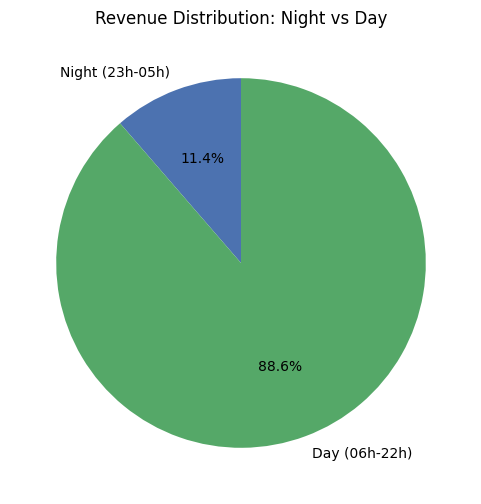

In [ ]:
# Filter night hours (23h -> 5h)
mask_night = (df_clean["pickup_time"] >= 23) | (df_clean["pickup_time"] <= 5)
mask_day = (df_clean["pickup_time"] >= 23) | (df_clean["pickup_time"] <= 5)
# Night revenue scaled up
night_revenue = df_clean.loc[mask_night, "total_amount"].sum()/sample_fraction
day_revenue = df_clean.loc[~mask_night, "total_amount"].sum()/sample_fraction
print("Night revenue:", night_revenue)
print("Day revenue:", day_revenue)

labels = ["Night (23h-05h)", "Day (06h-22h)"]
values = [night_revenue, day_revenue]

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct="%.1f%%", startangle=90, colors=["#4C72B0", "#55A868"])
plt.title("Revenue Distribution: Night vs Day")
plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

   passenger_count  Fare/Mile/Pax
0              1.0       9.620078
1              2.0       5.197319
2              3.0       3.240073
3              4.0       3.305491
4              5.0       1.777249
5              6.0       1.318360


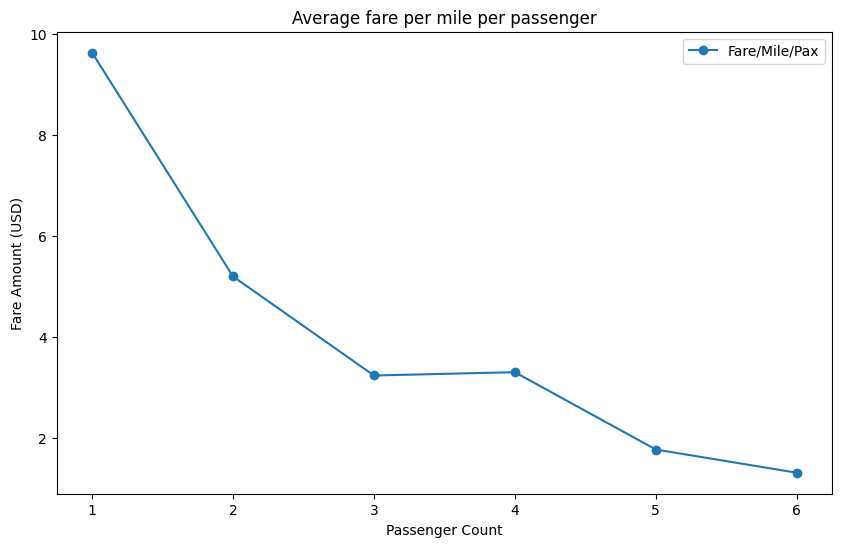

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts
# Create a new column 'fare_mile_pax'
df_clean["fare_mile_pax"] = df_clean["fare_amount"] / df_clean["trip_distance"] / df_clean["passenger_count"]
# Calculate the average value grouped by passenger count
avg_fare_mile_pax = df_clean.groupby("passenger_count")["fare_mile_pax"].mean().reset_index(name="Fare/Mile/Pax")
print(avg_fare_mile_pax)
#  Plot a line chart of the results
avg_fare_mile_pax.plot(
    x="passenger_count",
    y="Fare/Mile/Pax",
    kind="line",
    marker="o",
    figsize=(10,6)
)
plt.title("Average fare per mile per passenger")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount (USD)")
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

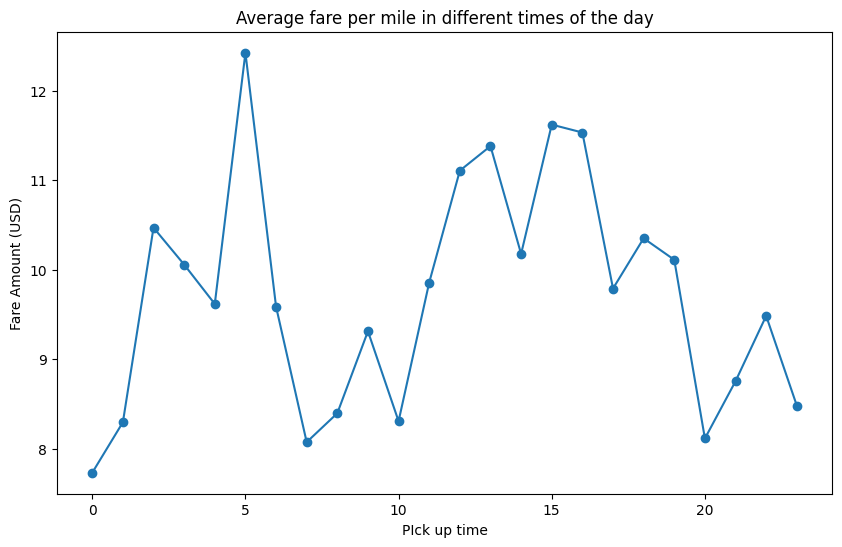

pickup_time
0      7.729236
1      8.293671
2     10.469173
3     10.056466
4      9.616251
5     12.425375
6      9.586552
7      8.071115
8      8.394194
9      9.311158
10     8.305110
11     9.856105
12    11.106857
13    11.381599
14    10.176066
15    11.621516
16    11.533185
17     9.788694
18    10.350338
19    10.110048
20     8.111949
21     8.752519
22     9.482871
23     8.480323
Name: fare_mile, dtype: float64


In [ ]:
# Compare the average fare per mile for different days and for different times of the day
# Create a new column 'fare_mile'
df_clean["fare_mile"] = (df_clean["fare_amount"] / df_clean["trip_distance"])
# Calculate the average fare per mile grouped by times of the day
fare_mile_hour = df_clean.groupby("pickup_time")["fare_mile"].mean()
#  Plot a line chart of the results
fare_mile_hour.plot(
    x="pickup_time",
    y="fare_mile",
    kind="line",
    marker="o",
    figsize=(10,6)
)
plt.title("Average fare per mile in different times of the day")
plt.xlabel("PIck up time")
plt.ylabel("Fare Amount (USD)")
plt.show()
print(fare_mile_hour)

In [ ]:
df_clean.fare_mile.describe()

count    288090.000000
mean          9.787054
std         101.253965
min           0.001250
25%           5.657143
50%           7.142857
75%           9.000000
max       10000.000000
Name: fare_mile, dtype: float64

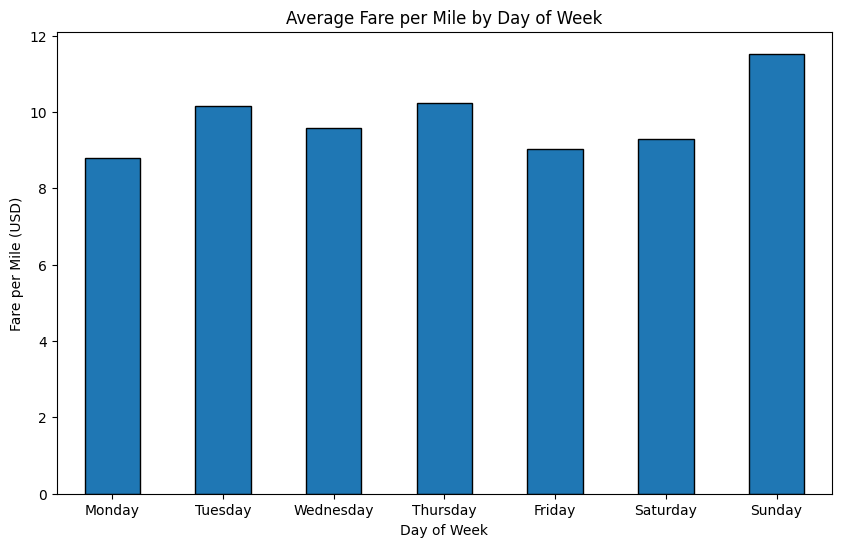

pickup_day_name
Monday        8.802116
Tuesday      10.165779
Wednesday     9.590974
Thursday     10.228358
Friday        9.017618
Saturday      9.283652
Sunday       11.523389
Name: fare_mile, dtype: float64


In [ ]:
# created fare_mile_day

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# Calculate the average fare per mile by day of the week
#    Reindex ensures the order is Monday → Sunday
fare_mile_day = (
    df_clean.groupby("pickup_day_name")["fare_mile"]
    .mean()
    .reindex(day_order)
)

# Plot results as a bar chart for better readability
ax = fare_mile_day.plot(
    kind="bar",
    figsize=(10,6),
    edgecolor="black"
)

# Add chart labels and formatting
ax.set_title("Average Fare per Mile by Day of Week")
ax.set_xlabel("Day of Week")
ax.set_ylabel("Fare per Mile (USD)")
ax.tick_params(axis='x', rotation=0)

plt.show()

# Print the aggregated values for reference
print(fare_mile_day)

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

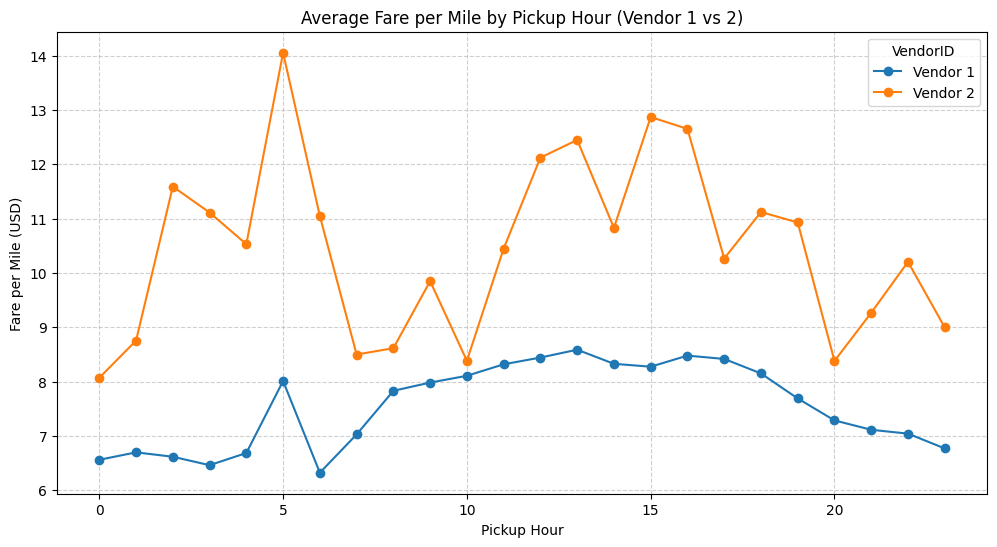

In [ ]:
# Compare fare per mile for different vendors
df_clean = df_clean[df_clean["vendorid"] != 6] #clean the data, only have two value 1 and 2
fare_mile_vendor = df_clean.groupby(["vendorid","pickup_time"])["fare_mile"].mean().reset_index()

plt.figure(figsize=(12, 6))
for v in fare_mile_vendor["vendorid"].unique():
    vendor_data = fare_mile_vendor[fare_mile_vendor["vendorid"] == v]
    plt.plot(
        vendor_data["pickup_time"],
        vendor_data["fare_mile"],
        marker="o",
        label=f"Vendor {v}"
    )

plt.title("Average Fare per Mile by Pickup Hour (Vendor 1 vs 2)")
plt.xlabel("Pickup Hour")
plt.ylabel("Fare per Mile (USD)")
plt.legend(title="VendorID")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [ ]:
fare_vedor = df_clean.groupby(["vendorid"])[["fare_amount","trip_distance","total_amount"]].sum().reset_index()
print(fare_vedor)

   vendorid  fare_amount  trip_distance  total_amount
0         1   1363692.12      241063.10    2011978.26
1         2   4181094.21      739712.51    6138301.41


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


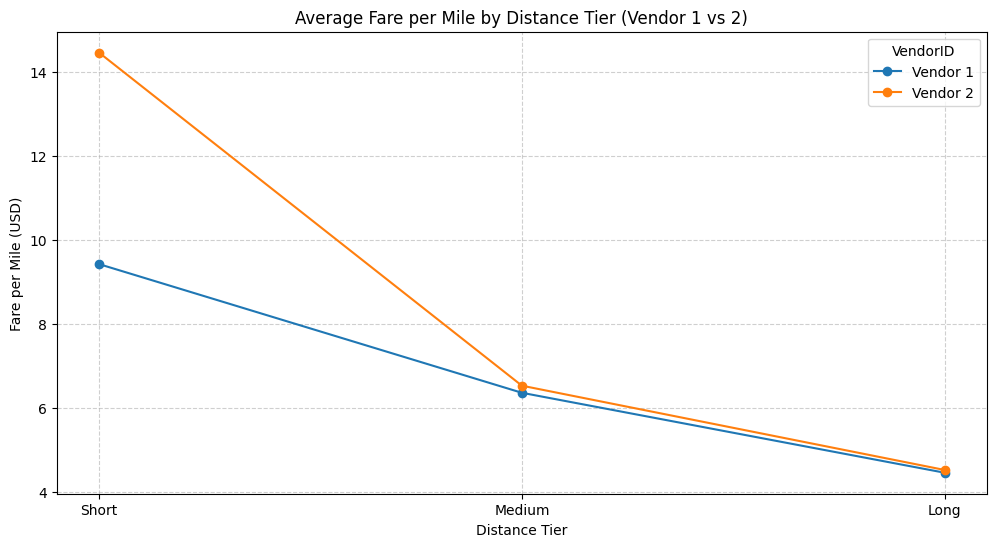

   vendorid distance_tier  fare_mile
0         1         Short   9.423508
1         1        Medium   6.355882
2         1          Long   4.449812
3         2         Short  14.465737
4         2        Medium   6.525211
5         2          Long   4.515351


In [ ]:
# Defining distance tiers
df_clean["distance_tier"] = pd.cut(df_clean["trip_distance"], bins=[0, 2, 5, np.inf], labels=["Short", "Medium", "Long"])
fare_mile_distance = df_clean.groupby(["vendorid", "distance_tier"])["fare_mile"].mean().reset_index()

plt.figure(figsize=(12, 6))
for v in fare_mile_distance["vendorid"].unique():
    vendor_data = fare_mile_distance[fare_mile_distance["vendorid"] == v]
    plt.plot(
        vendor_data["distance_tier"],
        vendor_data["fare_mile"],
        marker="o",
        label=f"Vendor {v}"
    )

plt.title("Average Fare per Mile by Distance Tier (Vendor 1 vs 2)")
plt.xlabel("Distance Tier")
plt.ylabel("Fare per Mile (USD)")
plt.legend(title="VendorID")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
print(fare_mile_distance)

In [ ]:
print(df_clean.groupby(["distance_tier"])["fare_mile"].mean().reset_index())

  distance_tier  fare_mile
0         Short  13.081959
1        Medium   6.483922
2          Long   4.499748


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

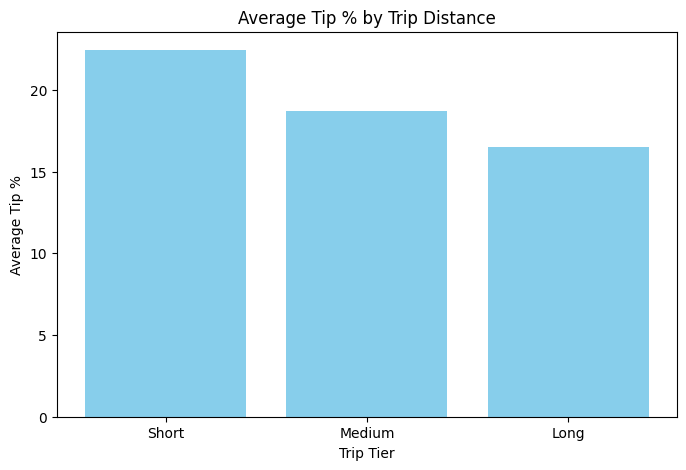

distance_tier  tip_pct  
Short          22.448078    1
Medium         18.692339    1
Long           16.520091    1
Name: count, dtype: int64

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Calculate and create tip_pct column
df_clean["tip_pct"] = df_clean["tip_amount"] / df_clean["fare_amount"] * 100
# Calculate average percentage tip by bins
avg_tip_by_tier = (
    df_clean.groupby("distance_tier")["tip_pct"]
    .mean()
    .reset_index()
)

# Plot a chart
plt.figure(figsize=(8,5))
plt.bar(avg_tip_by_tier["distance_tier"], avg_tip_by_tier["tip_pct"], color="skyblue")
plt.xlabel("Trip Tier")
plt.ylabel("Average Tip %")
plt.title("Average Tip % by Trip Distance")
plt.show()
avg_tip_by_tier.value_counts()

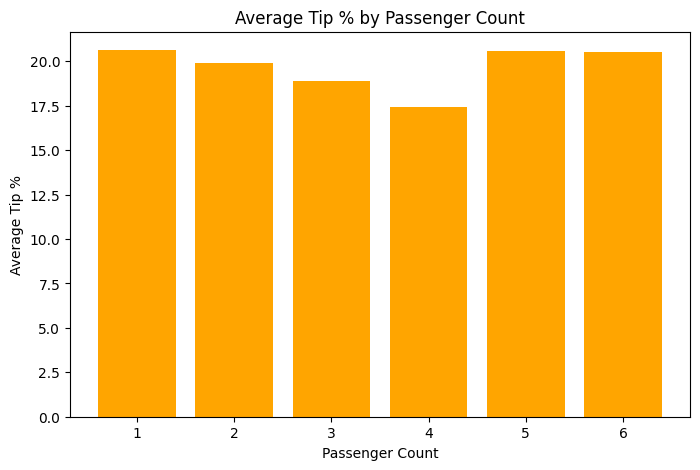

passenger_count  tip_pct  
1.0              20.634222    1
2.0              19.913446    1
3.0              18.875745    1
4.0              17.438979    1
5.0              20.592628    1
6.0              20.551866    1
Name: count, dtype: int64

In [ ]:
# Analyze tip percentages based on Passenger counts

# Tính trung bình tip % theo pax counts
avg_tip_by_paxcount = df_clean.groupby("passenger_count")["tip_pct"].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(8,5))
plt.bar(avg_tip_by_paxcount["passenger_count"], avg_tip_by_paxcount["tip_pct"], color="orange")
plt.xlabel("Passenger Count")
plt.ylabel("Average Tip %")
plt.title("Average Tip % by Passenger Count")
plt.show()
avg_tip_by_paxcount.value_counts()

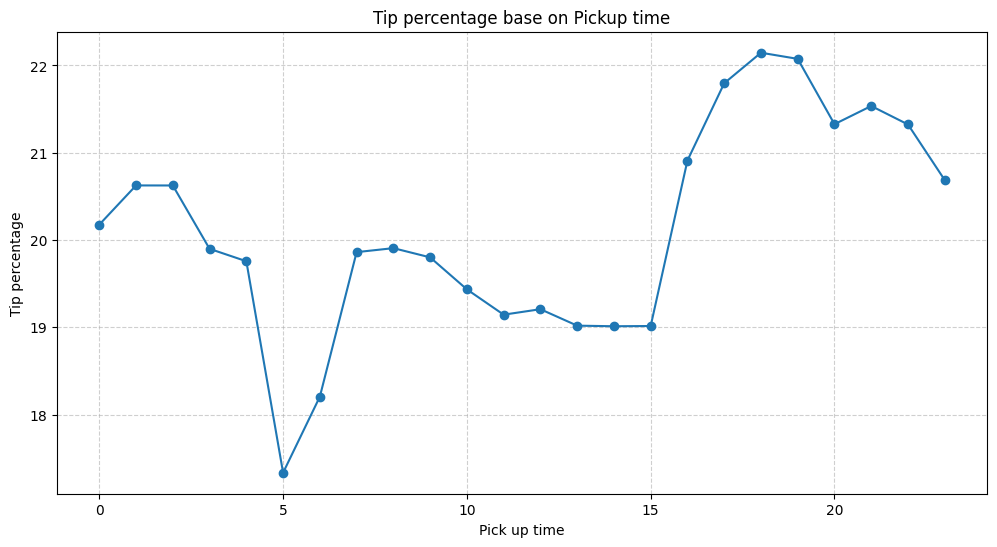

pickup_time    tip_pct
0             0  20.175832
1             1  20.624882
2             2  20.624433
3             3  19.898639
4             4  19.756530
5             5  17.334048
6             6  18.205159
7             7  19.860831
8             8  19.906510
9             9  19.800907
10           10  19.434433
11           11  19.144393
12           12  19.207106
13           13  19.018702
14           14  19.011948
15           15  19.014580
16           16  20.910027
17           17  21.795197
18           18  22.145100
19           19  22.074695
20           20  21.326403
21           21  21.534867
22           22  21.323230
23           23  20.686024

In [ ]:
# Analyze tip percentages based on Pickup times
avg_tip_by_putime = df_clean.groupby("pickup_time")["tip_pct"].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
vendor_data = avg_tip_by_putime
plt.plot(
        vendor_data["pickup_time"],
        vendor_data["tip_pct"],
        marker="o",
        label=f"Tip %")

plt.title("Tip percentage base on Pickup time")
plt.xlabel("Pick up time")
plt.ylabel("Tip percentage")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
avg_tip_by_putime

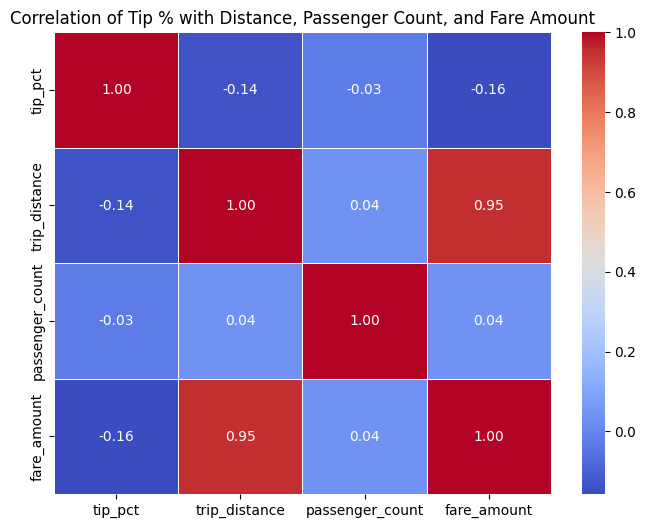

In [ ]:
# To check the correlation of tip percentage with distance, passenger count, and fare amount, create a correlation heatmap.
# Select relevant numeric columns for correlation
corr_features = ["tip_pct", "trip_distance", "passenger_count", "fare_amount"]

# Compute correlation matrix
corr_matrix = df_clean[corr_features].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,           # show correlation values
    cmap="coolwarm",      # color palette
    fmt=".2f",            # format numbers
    linewidths=0.5
)
plt.title("Correlation of Tip % with Distance, Passenger Count, and Fare Amount")
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

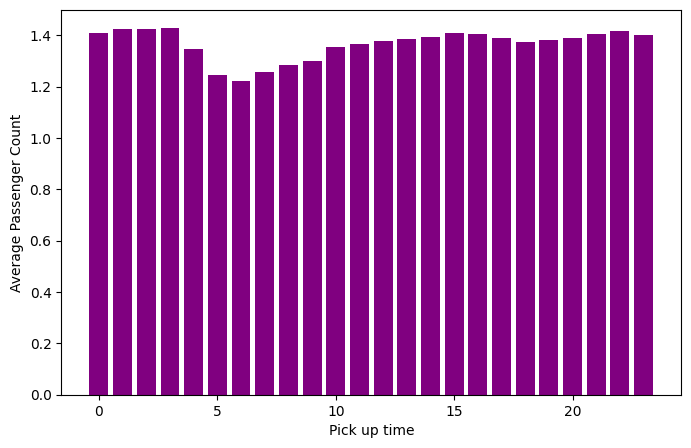

In [ ]:
# See how passenger count varies across hours and days
# Passenger count varies across Pickup time
# Calculate & create paxcount_putime group by pickup_time
paxcount_putime = df_clean.groupby(["pickup_time"])["passenger_count"].mean().reset_index()
# Plot a chart
plt.figure(figsize=(8,5))
plt.bar(paxcount_putime["pickup_time"], paxcount_putime["passenger_count"], color="purple")
plt.xlabel("Pick up time")
plt.ylabel("Average Passenger Count")
plt.show()


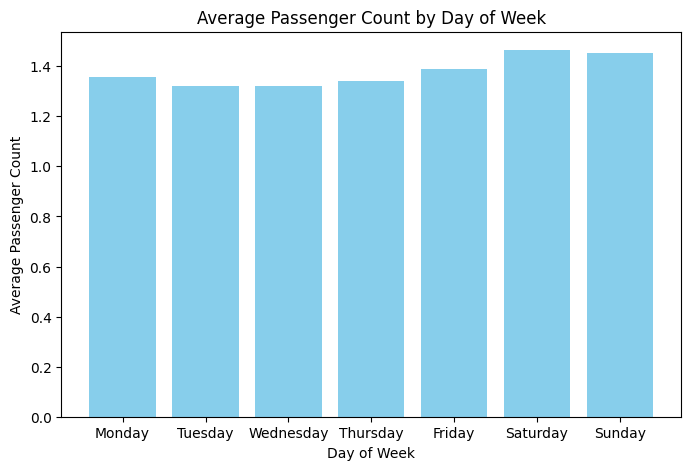

In [ ]:
# Passenger count varies across day of week
# Calculate & create paxcount_puday group by pickup_day_name
paxcount_puday = (
    df_clean.groupby("pickup_day_name")["passenger_count"]
            .mean()
            .reindex(day_order))   # Series)

paxcount_puday = paxcount_puday.reset_index(name="passenger_count")

# Plot a chart
plt.figure(figsize=(8,5))
plt.bar(paxcount_puday["pickup_day_name"], paxcount_puday["passenger_count"], color="skyblue")
plt.xlabel("Day of Week")
plt.ylabel("Average Passenger Count")
plt.title("Average Passenger Count by Day of Week")
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones
paxcount_zone = df_clean.groupby(["zone"])["passenger_count"].mean().reset_index()
print(paxcount_zone.sort_values("passenger_count", ascending=False).head(20))

                                 zone  passenger_count
179  Saint Michaels Cemetery/Woodside         3.000000
168                   Randalls Island         2.333333
177                 Rossville/Woodrow         2.000000
169                          Red Hook         1.888889
73                   Elmhurst/Maspeth         1.888889
14                       Bedford Park         1.714286
16                            Belmont         1.666667
28                 Brooklyn Navy Yard         1.666667
111                        Kensington         1.636364
8                        Battery Park         1.620438
198                  Sunset Park West         1.588235
134                           Maspeth         1.578947
6                        Baisley Park         1.528736
37                       Central Park         1.515158
107                       JFK Airport         1.509944
92                          Gravesend         1.500000
2             Arrochar/Fort Wadsworth         1.500000
127       

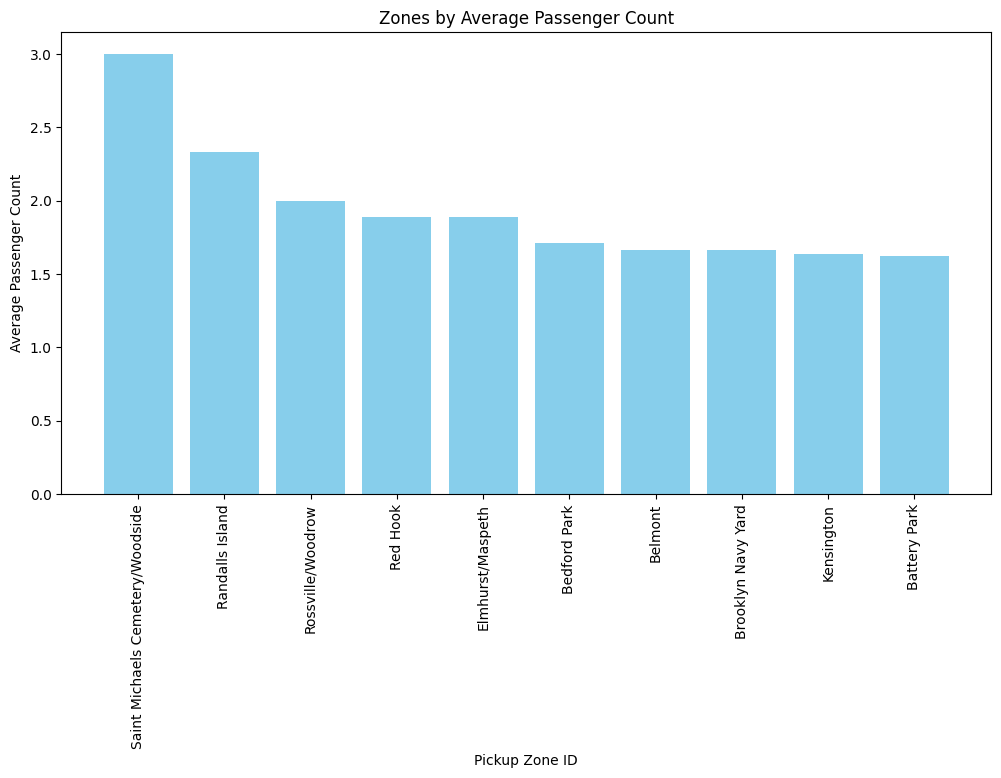

In [ ]:
top_zones = paxcount_zone.sort_values("passenger_count", ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top_zones["zone"].astype(str), top_zones["passenger_count"], color="skyblue")
plt.xlabel("Pickup Zone ID")
plt.ylabel("Average Passenger Count")
plt.title("Zones by Average Passenger Count")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_with_trips = zones.merge(
    paxcount_zone,
    left_on="zone",
    right_on="zone",
    how="left")
zones_with_trips["avg_passenger_count"] = zones_with_trips["passenger_count"]
zones_with_trips.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   passenger_count  avg_passenger_count  
0         1.000000             1.000000  
1              NaN                  NaN  
2         1.000000             1.000000  
3         1.335979             1.335979  
4              NaN                  NaN

<Figure size 1600x1200 with 0 Axes>

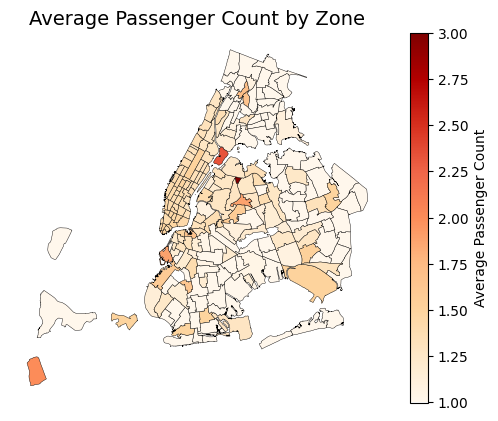

In [ ]:
# Visualized with a choropleth map
plt.figure(figsize=(16,12))

zones_with_trips.plot(
    column="avg_passenger_count",
    cmap="OrRd",
    legend=True,
    legend_kwds={"label": "Average Passenger Count"},
    edgecolor="black",
    linewidth=0.3
)
plt.title("Average Passenger Count by Zone", fontsize=14)
plt.axis("off")
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?
# Surcharge incude: Extra, improvement_surcharge, tolls_amount, congestion_surcharge, airport_feee
surcharge_cols = ["extra", "improvement_surcharge", "tolls_amount", "congestion_surcharge", "airport_fee"]

# Calculate % trip with surcharge > 0
surcharge_stats = {}
for col in surcharge_cols:
    pct = (df_clean[col] > 0).mean() * 100
    surcharge_stats[col] = pct

# IInput to DataFrame for visualize
surcharge_df = pd.DataFrame.from_dict(surcharge_stats, orient="index", columns=["% Trips with Surcharge"])
print(surcharge_df)


                       % Trips with Surcharge
extra                               60.922621
improvement_surcharge               99.999653
tolls_amount                         7.725769
congestion_surcharge                91.007433
airport_fee                          8.038563


Extra - Pickup time

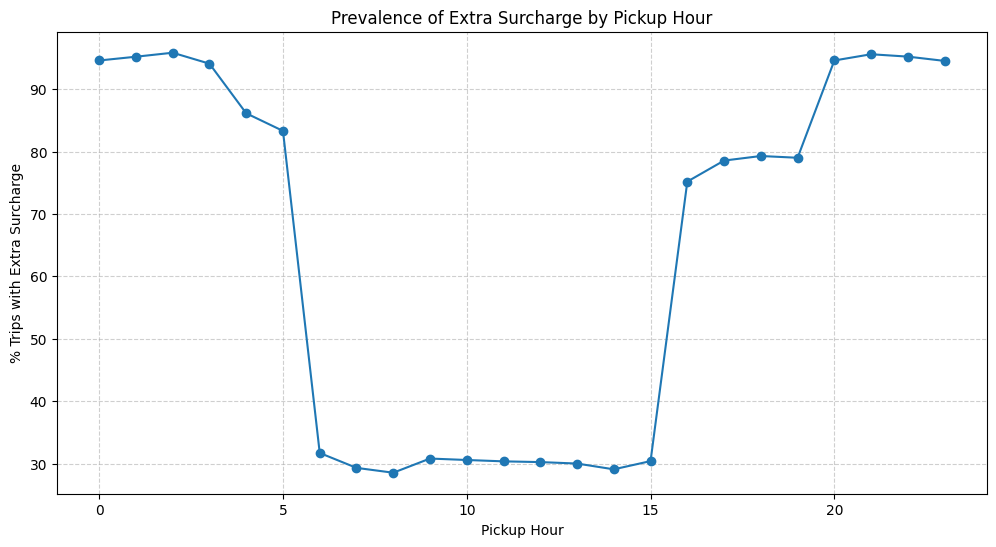

pickup_time  pct_with_extra
0             0       94.610778
1             1       95.215848
2             2       95.856274
3             3       94.099516
4             4       86.145405
5             5       83.322476
6             6       31.690501
7             7       29.302736
8             8       28.524259
9             9       30.797337
10           10       30.563865
11           11       30.346722
12           12       30.229037
13           13       29.995076
14           14       29.069305
15           15       30.387355
16           16       75.196328
17           17       78.565980
18           18       79.297815
19           19       79.015840
20           20       94.612029
21           21       95.612024
22           22       95.230686
23           23       94.542329

In [ ]:
extra_by_hour = (
    df_clean.groupby("pickup_time")["extra"]
    .apply(lambda x: (x > 0).mean() * 100)
    .reset_index(name="pct_with_extra")
)

#  chart
plt.figure(figsize=(12,6))
plt.plot(extra_by_hour["pickup_time"], extra_by_hour["pct_with_extra"], marker="o")
plt.title("Prevalence of Extra Surcharge by Pickup Hour")
plt.xlabel("Pickup Hour")
plt.ylabel("% Trips with Extra Surcharge")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
extra_by_hour

tolls_amount - Zone

         borough  pct_with_tolls
0          Bronx       18.133333
1       Brooklyn        8.306011
2            EWR       33.333333
3      Manhattan        2.964068
4         Queens       54.606663
5  Staten Island       50.000000


<Figure size 1000x800 with 0 Axes>

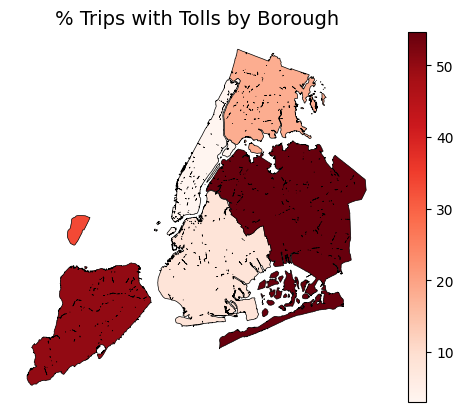

In [ ]:
tolls_by_zone = (
    (df_clean.assign(has_toll=df_clean["tolls_amount"] > 0)
     .groupby("borough")["has_toll"].mean() * 100)
    .reset_index(name="pct_with_tolls"))
print(tolls_by_zone)
# Group shapefile lên borough level
boroughs = zones.dissolve(by="borough").reset_index()

# Merge dữ liệu tolls_by_zone (đang có sẵn từ df_clean)
boroughs = boroughs.merge(tolls_by_zone, on="borough")

# Vẽ map
plt.figure(figsize=(10,8))
boroughs.plot(
    column="pct_with_tolls",
    cmap="Reds",
    edgecolor="black",
    legend=True,
    linewidth=0.5
)
plt.title("% Trips with Tolls by Borough", fontsize=14)
plt.axis("off")
plt.show()

Airport fee - zone

         borough  pct_with_airport_fee
0          Bronx              0.000000
1       Brooklyn              0.054645
2            EWR              0.000000
3      Manhattan              0.017865
4         Queens             88.716480
5  Staten Island              0.000000


<Figure size 1000x800 with 0 Axes>

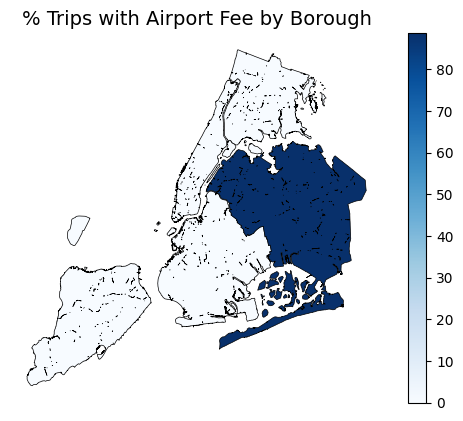

In [ ]:
airport_by_zone = (
    (df_clean.assign(has_airport=df_clean["airport_fee"] > 0)
     .groupby("borough")["has_airport"].mean() * 100)
    .reset_index(name="pct_with_airport_fee")
)
print(airport_by_zone)
# Group shapefile lên borough level
boroughs = zones.dissolve(by="borough").reset_index()

# Merge dữ liệu airport fee
boroughs = boroughs.merge(airport_by_zone, on="borough")

# Vẽ map
plt.figure(figsize=(10,8))
boroughs.plot(
    column="pct_with_airport_fee",
    cmap="Blues",
    edgecolor="black",
    legend=True,
    linewidth=0.5
)
plt.title("% Trips with Airport Fee by Borough", fontsize=14)
plt.axis("off")
plt.show()

Only QUeen have airport in the city which cause of only trip in this Borogh have airport_fee

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**Current inefficiencies can be observed across multiple layers:**

- Mismatch between demand and supply: Zones such as 70 (ratio 8.8), 66 (7.97), 132 (4.5), 121 (3.7), and 127 (3.2) show strong pickup/dropoff imbalances. Vehicles leave these zones full but rarely return with passengers, creating high volumes of empty backhauls.

- Underutilization during off-peak hours: At 05:00 AM, trip volume is very low, yet the average fare spikes to 12.4 USD/mile and tip percentages drop to 17%. This combination suggests that riders perceive the service as expensive and unsatisfactory.

- Low efficiency in specific corridors: Routes such as 236→237 and 237→237 loops record the lowest average speeds (6.5-7.5 mph) in peak hours, reducing vehicle turnover.

- Passenger pooling potential: While average trips only carry 1.3–1.5 passengers, outlier zones like Saint Michaels (3.0 pax/trip) and Randalls Island (2.3 pax/trip) indicate opportunities to consolidate demand in select locations.

- Seasonal fluctuations: January, February, July, August, and September show significantly lower monthly demand, leaving parts of the fleet underutilized.

**Recommendations A unified routing and dispatching strategy should:**

- Rebalance mismatched zones (70, 66, 132, 121, 127) through incentives for return drop-offs, minimizing empty miles.

- Adjust early-morning fleet allocation by shifting idle night vehicles into 05:00–07:00 AM and pairing this with promotional fares to stimulate demand.

- Provide drivers with real-time traffic guidance to bypass congested routes such as 236–237, reducing delays and increasing productivity.

- Deploy pooling selectively: encourage ride-sharing only for long trips departing from peak-hour zones (where both passengers and fleet efficiency benefit), and in zones with naturally higher group sizes like Saint Michaels.

- Implement seasonal fleet shifts or partnerships (e.g., tourism and events) to stabilize utilization during low-demand months.

Taken together, these measures aim to make routing more adaptive, minimize wasted trips, and stabilize fleet productivity year-round.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Trip trends highlight that demand is highly zone- and time-dependent. Zones 161 and 162 peak sharply between 7–10 AM, Zone 237 shows unusual spikes at midday (around 12 PM), and evening trips cluster in Zones 79, 249, 148, 48, and 132. Meanwhile, Zones 132, 237, 161, 236, and 162 consistently exceed 10,000 trips each, marking them as high-demand residential areas.

**Positioning strategy:** Vehicles should be distributed in line with both time-based and zone-based demand curves. Specifically:

- Maintain a higher number of standby cabs in Zones 161 and 162 during morning peaks, Zone 237 around midday, and evening-focused zones after 7 PM.

- Ensure a baseline presence in the consistently high-demand residential zones (132, 237, 161, 236, 162) to cover daily commuting needs.


- Implement targeted discount policies to encourage drop-offs into high-demand zones (e.g., Zone 237 around noon), so that vehicles are naturally rebalanced toward areas of peak demand while also giving riders a financial incentive.

By strategically positioning cars based on observed temporal and spatial demand, the company can both prevent shortages in peak zones and reduce idle fleet in low-demand areas.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

**The data highlights several pricing inefficiencies:**

- By distance: Short trips (<2 miles) are charged ~11 USD/mile, nearly double medium trips (6.4 USD/mile) and more than double long trips (4.7 USD/mile). While profitable, this discourages longer trips that could improve vehicle utilization.

- By time of day: Fares peak at 05:00 AM (12.4 USD/mile), well above the daily average (8.7 USD/mile). Yet this hour coincides with low demand and the lowest tip percentage (17%), signaling that customers feel overcharged. Peak-hour pricing (10–11.5 USD/mile) is justifiable, but early-morning premiums appear excessive.

- By day of week: Sundays see the highest fares (11.52 USD/mile), primarily due to short leisure trips, while weekdays average lower (8.8–10.2 USD/mile).

- By passenger count: Solo riders face ~9.6 USD/mile/pax, but pooling can lower costs dramatically to ~1.3 USD/mile/pax for six riders. However, adoption is inconsistent.

- By tipping behavior: Tipping falls significantly for long trips and early-morning rides, while being higher for short trips and nighttime rides.

**Recommendations: Adopt a flexible, data-driven pricing model that balances profitability and competitiveness:**

- Maintain high rates for short trips, but add slight surcharges for ultra-short (<1.5 mile) rides while introducing discounts for long trips to attract ridership and increase fleet utilization.

- Keep premium pricing during peak hours, but reduce early-morning fares moderately (e.g., 05:00) to improve customer satisfaction and encourage tipping.

- Adjust Sunday pricing slightly downward and introduce weekend pooling promotions to boost demand.

- Incentivize pooling for long trips departing high-demand zones (where both customers and the fleet benefit).

- Introduce in-app tipping prompts with % defaults, especially for long and early-morning rides, to increase tip revenues.

- Enhance fare transparency on surcharges (tolls, congestion, extras, airport fees) to improve trust and reduce cancellations.

Taken together, these adjustments make pricing more responsive to distance, time, and rider behavior, ensuring higher utilization, stronger customer perception of value, and maximized revenues.
